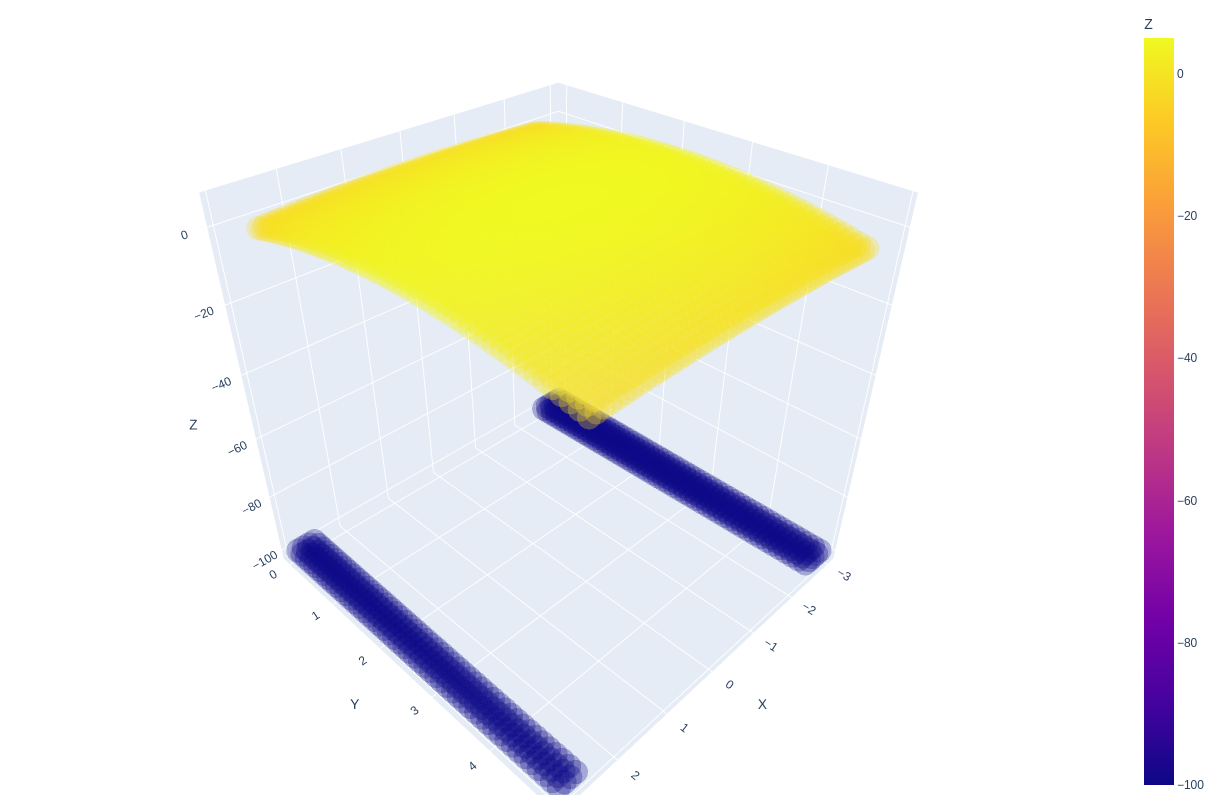

In [17]:
import numpy as np
import pandas as pd
#Generar los espacios
h=0.1
X_cord,Y_cord=np.mgrid[-3:3:h,0:5:h]
xy = np.vstack((X_cord.flatten(), Y_cord.flatten())).T
#generar el pit
def g_func(point):
    value=-100
    if abs(point[0])<=2.5:
        value=-0.2*((point[0])**2)-1*(point[1]-2.5)**2+5
    return value

pit=xy
g_values=np.array(list())
for point in pit:
    g_values=np.append(g_values,g_func(point))


df = pd.DataFrame(dict(
    X=pit[:,0], 
    Y=pit[:,1], 
    Z=g_values
))

import plotly.express as px

fig = px.scatter_3d(df, x='X', y='Y', z='Z',opacity=0.3,color='Z')
fig.update_layout(margin=dict(l=5, r=5, t=5, b=5),width=800, height=800)
fig.show()

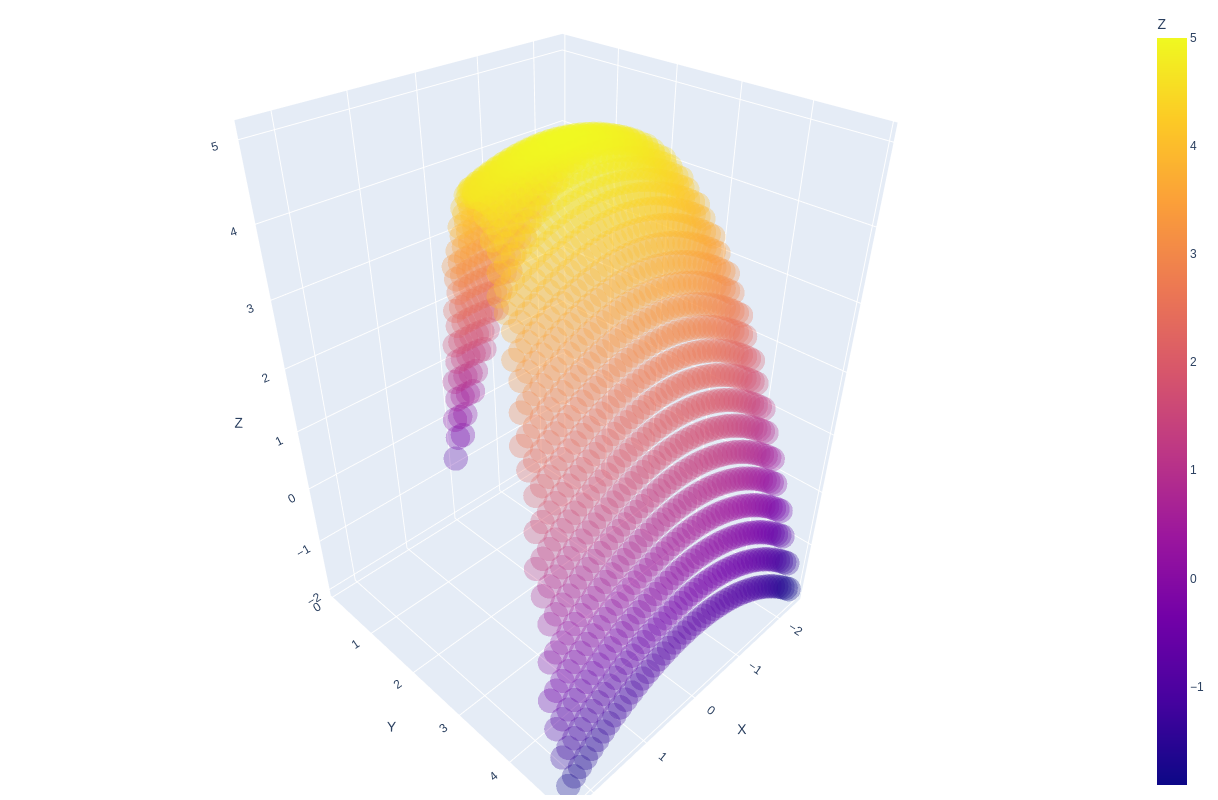

In [16]:
def gamma_sq(x0,pit):
    Gamma=np.array(list())
    for point in pit:
        if 2*abs(point[0]-x0[0]) +x0[1] <=point[1]:
            Gamma=np.append(Gamma,point)
    return np.reshape(Gamma,(-1,2))

gamma_vertex=gamma_sq([0,0],pit)

g_values_2=np.array(list())
for point in gamma_vertex:
    g_values_2=np.append(g_values_2,g_func(point))

df_2 = pd.DataFrame(dict(
    X=gamma_vertex[:,0], 
    Y=gamma_vertex[:,1], 
    Z=g_values_2
))

import plotly.express as px

fig_2 = px.scatter_3d(df_2, x='X', y='Y', z='Z',opacity=0.3,color='Z')
fig_2.update_layout(margin=dict(l=5, r=5, t=5, b=5),width=800, height=800)
fig_2.show()